## 1. Importing the Necessary Libraries and Dataset

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import Ridge, Lasso
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Changing display settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.3f'% x)

#Fixing the seed value
np.random.seed(0)

In [3]:
# Reading the input dataset

housing = pd.read_csv('train.csv')
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### 1.1 Data Checks

In [4]:
# Checking shape of dataset
print(housing.shape)

(1460, 81)


In [5]:
# Checking column datatypes and missing values
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking for data spread and outliers
housing.describe()

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1201.000   1460.000     1460.000     1460.000   
mean   730.500      56.897       70.050  10516.828        6.099        5.575   
std    421.610      42.301       24.285   9981.265        1.383        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
25%    365.750      20.000       59.000   7553.500        5.000        5.000   
50%    730.500      50.000       69.000   9478.500        6.000        5.000   
75%   1095.250      70.000       80.000  11601.500        7.000        6.000   
max   1460.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count   1460.000      1460.000    1452.000    1460.000    1460.000   1460.000   
mean    1971.268      1984.866     103.685     443.640      46.549    567.240   
std       30.203        20.645     181.066     456.098     161.319    441.867   
min     1872.000      1950.000       0.000       0.000       0.000      0.000   
25%     1954.000      1967.000       0.000       0.000       0.000    223.000   
50%     1973.000      1994.000       0.000     383.500       0.000    477.500   
75%     2000.000      2004.000     166.000     712.250       0.000    808.000   
max     2010.000      2010.000    1600.000    5644.000    1474.000   2336.000   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count     1460.000  1460.000  1460.000      1460.000   1460.000      1460.000   
mean      1057.429  1162.627   346.992         5.845   1515.464         0.425   
std        438.705   386.588   436.528        48.623    525.480         0.519   
min          0.000   334.000     0.000         0.000    334.000         0.000   
25%        795.750   882.000     0.000         0.000   1129.500         0.000   
50%        991.500  1087.000     0.000         0.000   1464.000         0.000   
75%       1298.250  1391.250   728.000         0.000   1776.750         1.000   
max       6110.000  4692.000  2065.000       572.000   5642.000         3.000   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count      1460.000  1460.000  1460.000      1460.000      1460.000   
mean          0.058     1.565     0.383         2.866         1.047   
std           0.239     0.551     0.503         0.816         0.220   
min           0.000     0.000     0.000         0.000         0.000   
25%           0.000     1.000     0.000         2.000         1.000   
50%           0.000     2.000     0.000         3.000         1.000   
75%           0.000     2.000     1.000         3.000         1.000   
max           2.000     3.000     2.000         8.000         3.000   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count      1460.000    1460.000     1379.000    1460.000    1460.000   
mean          6.518       0.613     1978.506       1.767     472.980   
std           1.625       0.645       24.690       0.747     213.805   
min           2.000       0.000     1900.000       0.000       0.000   
25%           5.000       0.000     1961.000       1.000     334.500   
50%           6.000       1.000     1980.000       2.000     480.000   
75%           7.000       1.000     2002.000       2.000     576.000   
max          14.000       3.000     2010.000       4.000    1418.000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count    1460.000     1460.000       1460.000   1460.000     1460.000   
mean       94.245       46.660         21.954      3.410       15.061   
std       125.339       66.256         61.119     29.317       55.757   
min         0.000        0.000          0.000      0.000        0.000   
25%         0.000        0.000          0.000      0.000        0.000   
50%         0.000       25.000          0.000      0.000        0.000   
75%       168.000       68.000 

**`OBSERVATIONS:`**
- Can observe count mismatches in some columns indicating Missing values, and also major difference between 75% and max value indicating outliers in the dataset

### 1.2 Data Cleaning & Handling of Missing Values

In [7]:
# Dropping ID column as it has a unique number for all rows, and doesn't give any meaningful insights

s_housing = housing.drop('Id', axis=1)

In [8]:
# Finding missing values

missing_val = round((s_housing.isnull().sum()/len(s_housing))*100,2)
missing_val[missing_val>0]

LotFrontage    17.740
Alley          93.770
MasVnrType      0.550
MasVnrArea      0.550
BsmtQual        2.530
BsmtCond        2.530
BsmtExposure    2.600
BsmtFinType1    2.530
BsmtFinType2    2.600
Electrical      0.070
FireplaceQu    47.260
GarageType      5.550
GarageYrBlt     5.550
GarageFinish    5.550
GarageQual      5.550
GarageCond      5.550
PoolQC         99.520
Fence          80.750
MiscFeature    96.300
dtype: float64

In [9]:
# Since in some Categorical Features 'NA' indicates as that Feature not available in the house, it is not actually a 
# Missing Value, Hence replacing those Category NA with 'None' value

cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for i in cols:
    s_housing[i].fillna('None', inplace=True)

In [10]:
# Checking missing values again

missing_val = round((s_housing.isnull().sum()/len(s_housing))*100,2)
missing_val[missing_val > 0]

LotFrontage   17.740
MasVnrType     0.550
MasVnrArea     0.550
Electrical     0.070
GarageYrBlt    5.550
dtype: float64

In [11]:
# Replacing categorical columns 'Electrical', 'MasVnrType' with mode() value

s_housing['Electrical'].fillna(s_housing['Electrical'].mode()[0], inplace=True)
s_housing['MasVnrType'].fillna(s_housing['MasVnrType'].mode()[0], inplace=True)

In [12]:
# Replacing numerical columns with Median values

s_housing['LotFrontage'].fillna(s_housing['LotFrontage'].median(), inplace=True)
s_housing['MasVnrArea'].fillna(s_housing['MasVnrArea'].median(), inplace=True)
s_housing['GarageYrBlt'].fillna(s_housing['GarageYrBlt'].median(), inplace=True)

In [13]:
# Checking missing values again

missing_val = round((s_housing.isnull().sum()/len(s_housing))*100,2)
missing_val[missing_val > 0]

Series([], dtype: float64)

### 1.3 Handling Columns with Class Imbalance

In [14]:
# Inspecting each categorical column

for i in s_housing.select_dtypes(include='object'):
    print(s_housing[i].value_counts(normalize=True), "\n")

RL        0.788
RM        0.149
FV        0.045
RH        0.011
C (all)   0.007
Name: MSZoning, dtype: float64 

Pave   0.996
Grvl   0.004
Name: Street, dtype: float64 

None   0.938
Grvl   0.034
Pave   0.028
Name: Alley, dtype: float64 

Reg   0.634
IR1   0.332
IR2   0.028
IR3   0.007
Name: LotShape, dtype: float64 

Lvl   0.898
Bnk   0.043
HLS   0.034
Low   0.025
Name: LandContour, dtype: float64 

AllPub   0.999
NoSeWa   0.001
Name: Utilities, dtype: float64 

Inside    0.721
Corner    0.180
CulDSac   0.064
FR2       0.032
FR3       0.003
Name: LotConfig, dtype: float64 

Gtl   0.947
Mod   0.045
Sev   0.009
Name: LandSlope, dtype: float64 

NAmes     0.154
CollgCr   0.103
OldTown   0.077
Edwards   0.068
Somerst   0.059
Gilbert   0.054
NridgHt   0.053
Sawyer    0.051
NWAmes    0.050
SawyerW   0.040
BrkSide   0.040
Crawfor   0.035
Mitchel   0.034
NoRidge   0.028
Timber    0.026
IDOTRR    0.025
ClearCr   0.019
StoneBr   0.017
SWISU     0.017
MeadowV   0.012
Blmngtn   0.012
BrDale    0.

In [15]:
#Dropping columns where a single category is explaining more than 90% of the column, (very less variance)

s_housing.drop(['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 
                'CentralAir', 'Electrical', 'Functional', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 
                'MiscFeature'], axis=1, inplace=True)

## 2. EDA

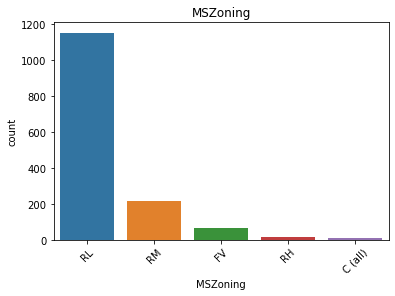

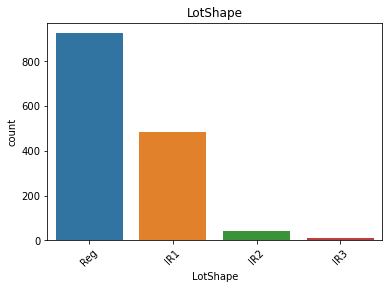

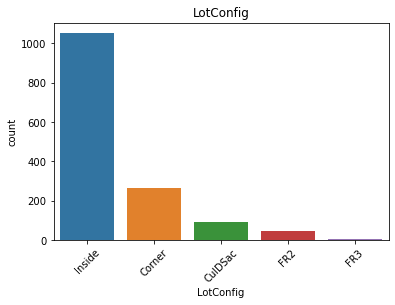

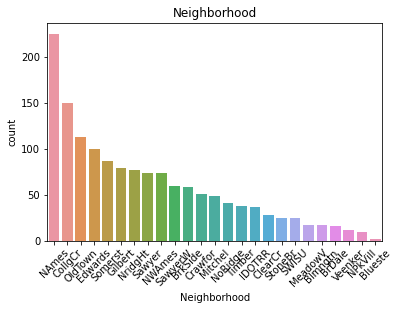

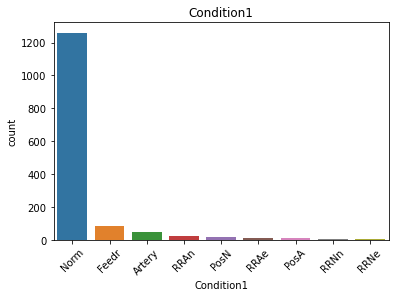

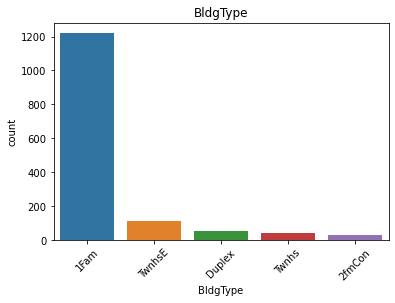

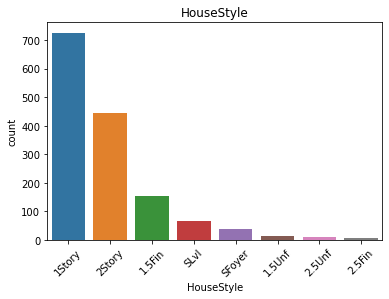

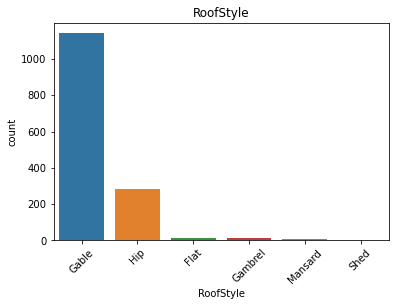

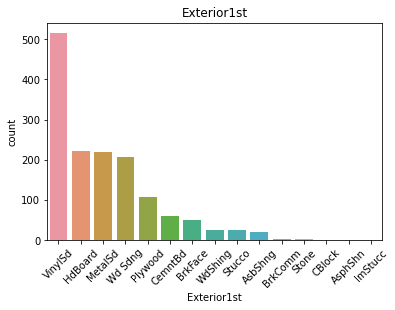

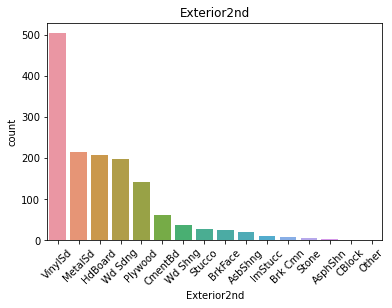

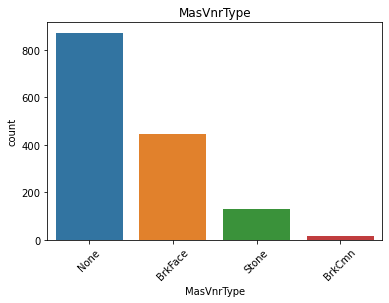

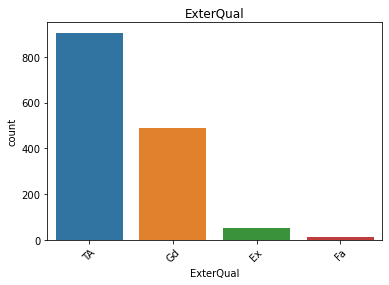

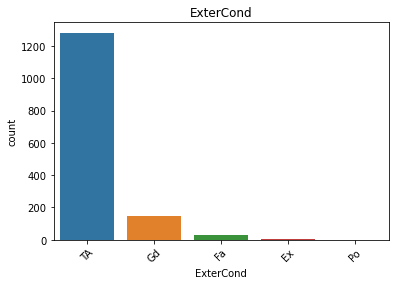

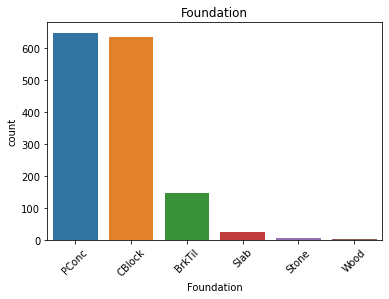

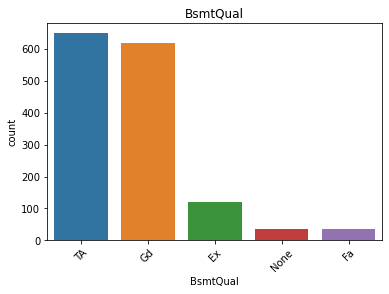

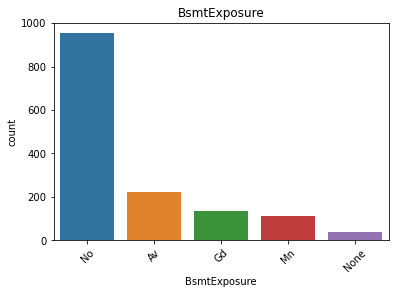

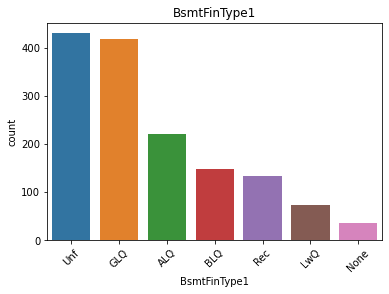

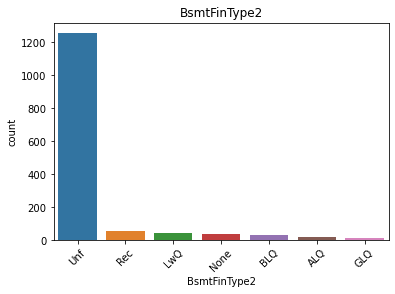

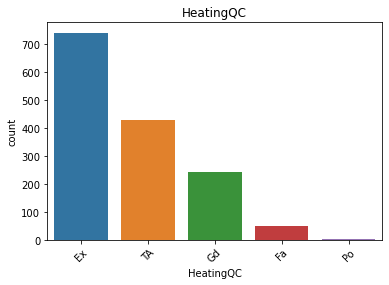

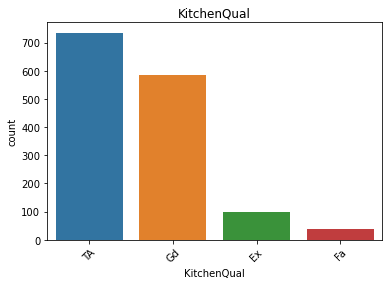

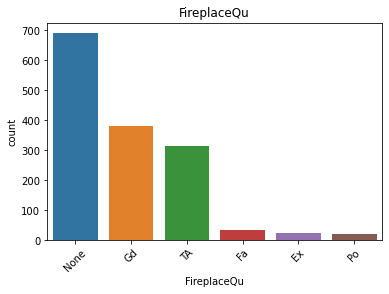

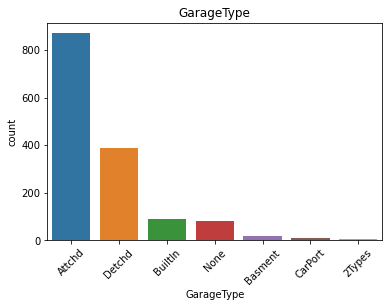

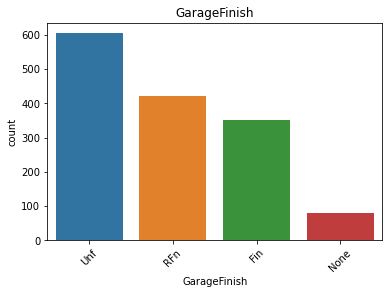

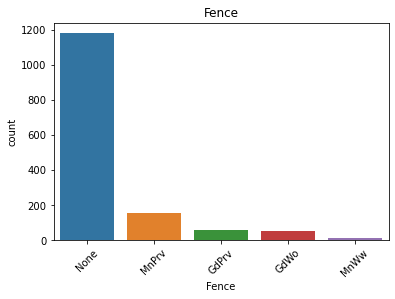

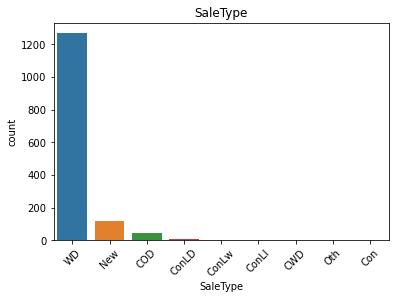

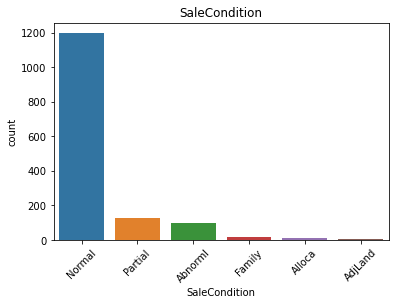

In [16]:
cols = s_housing.select_dtypes(include='object').columns

for i in cols:
    sns.countplot(data=s_housing, x= i, order=s_housing[i].value_counts().index)
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

**`OBSERVATIONS:`**
- Most classified zone of sale is 'Residential Low Density'.
- Most common shape of Properties is 'Regular', followed by 'Slightly irregular' with 'Inside' Lot Configuration for most houses.
- Many houses are located near North Ames and College Creek.
- Most houses are in Normal condition which has Single-family Detached type of Dwelling and of styles 1 or 2 stories with Gabble/ Hip roofs.
- Most houses have an exterior covering of Vinyl Siding with no Masonry veneer.
- Exterior quality and condition, basement quality is Average/Typical for most houses.
- House foundation is mostly laid by Poured Contrete or Cinder Block.
- Most houses don't have any basement exposure, and are Unfinished. Some houses have Good Living Quarters.
- Most houses have Excellent Heating Quality, average Kitchen Quality, with Unfinished/Rough finished Attached Garage space, and no Fireplace and Fence.
- Most houses come under the Sale type: Warranty Deed - Conventional, under Normal Sale conditions.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

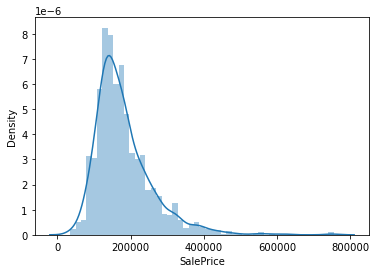

In [17]:
#Plotting the target variable 

sns.distplot(s_housing.SalePrice)

**`OBSERVATIONS:`**
- The target variable seems to be Right skewed, since it has very high Sale Prices for some houses.

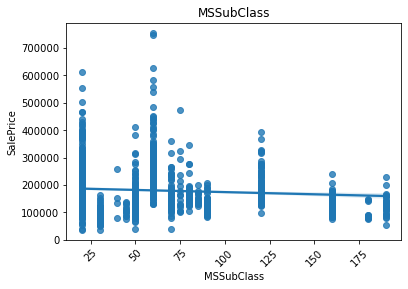

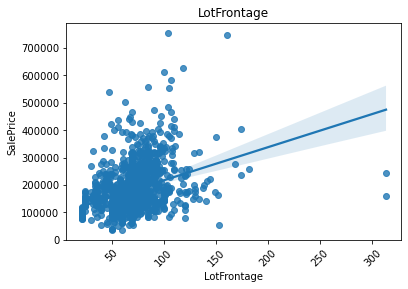

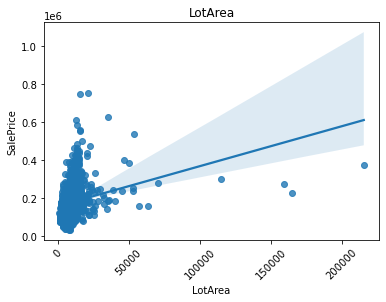

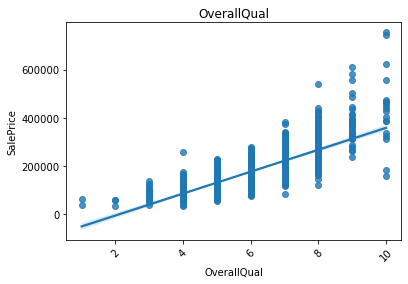

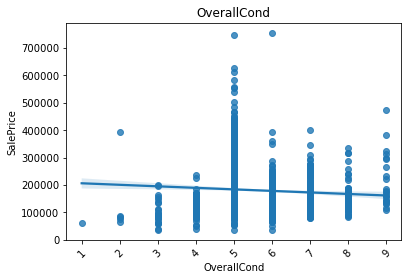

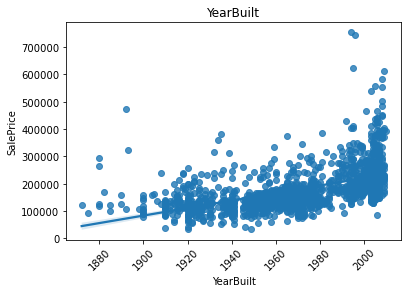

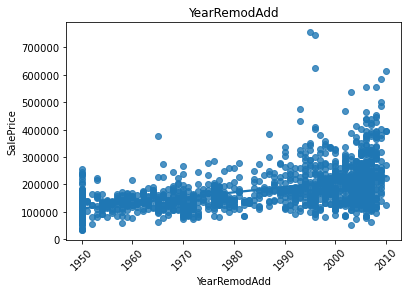

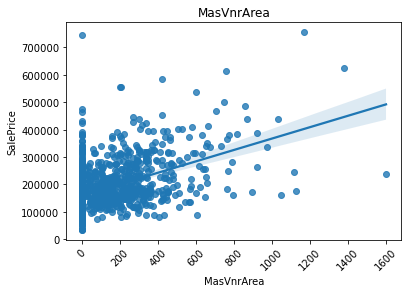

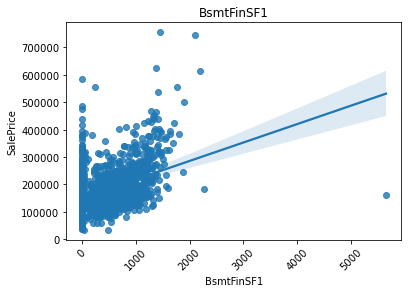

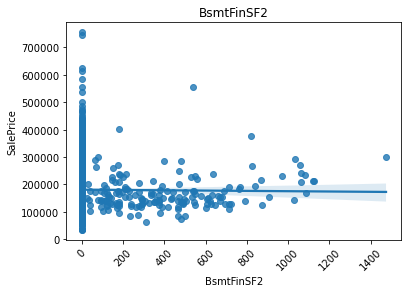

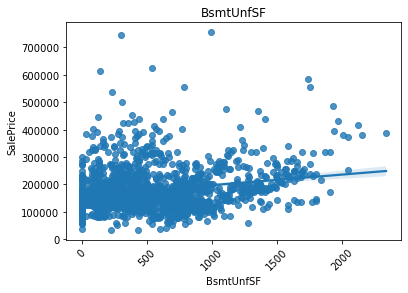

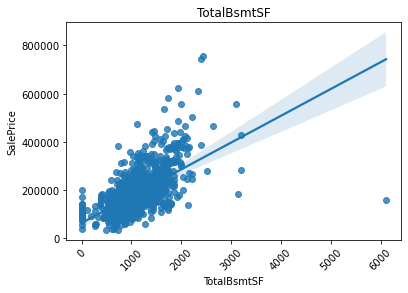

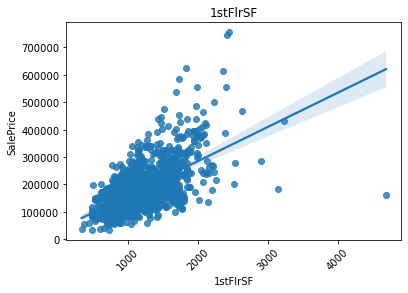

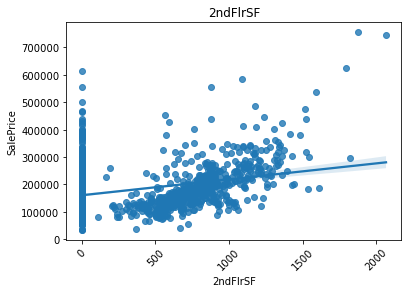

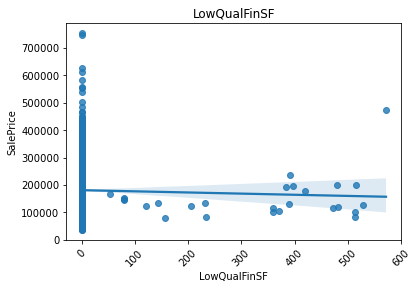

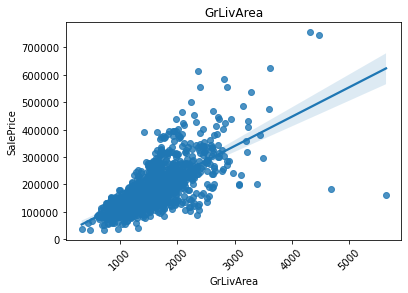

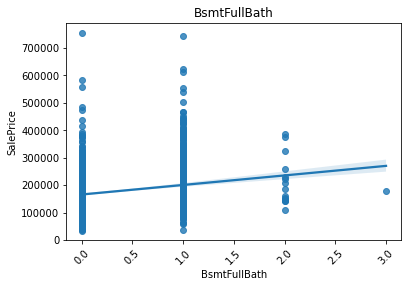

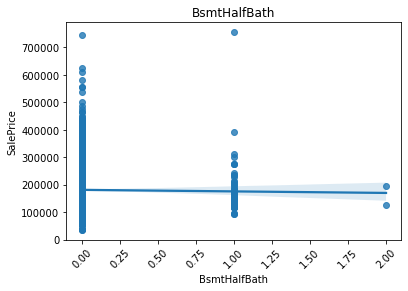

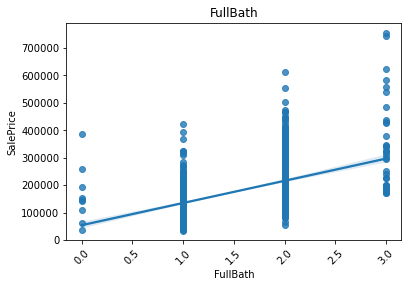

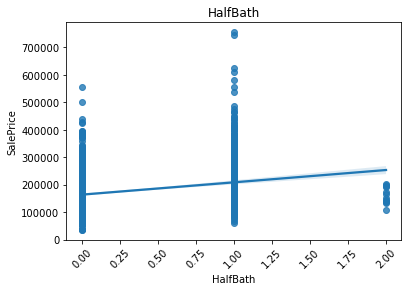

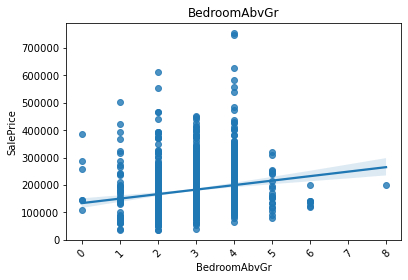

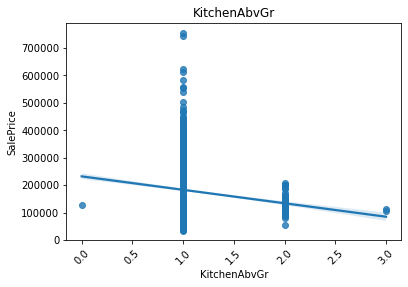

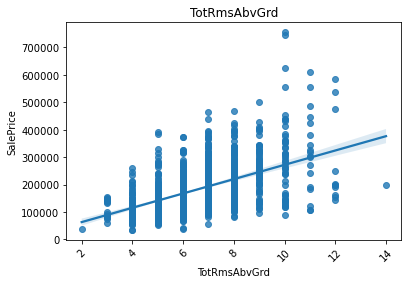

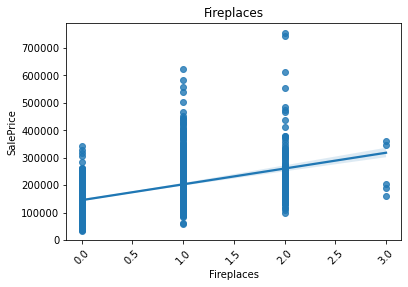

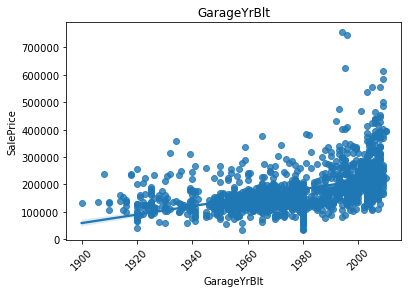

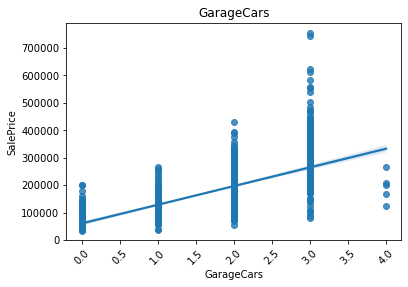

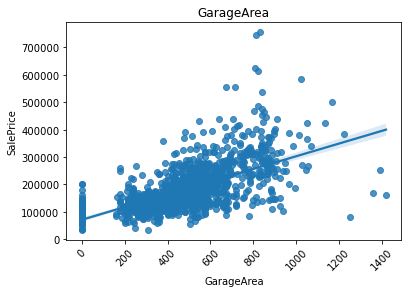

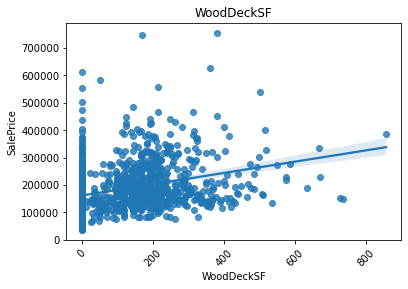

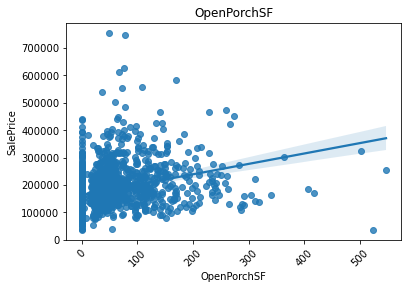

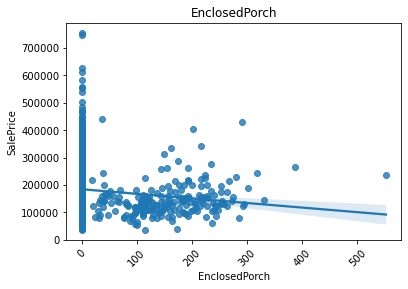

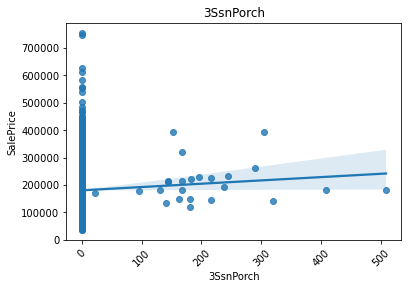

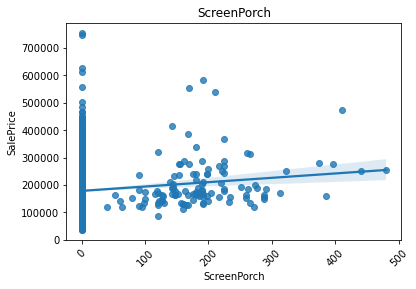

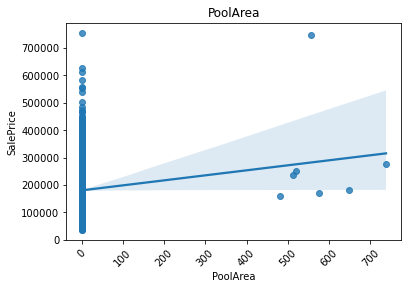

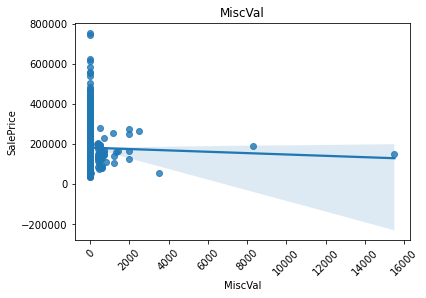

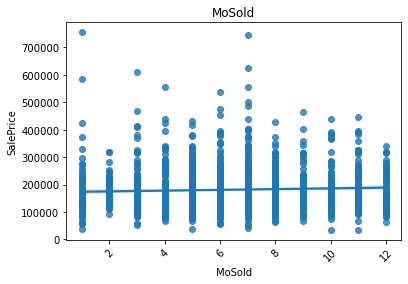

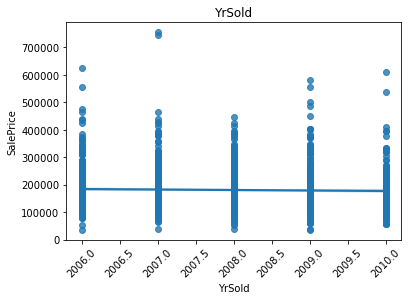

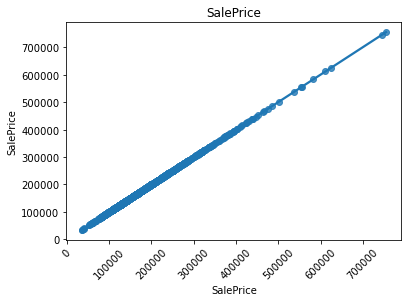

In [18]:
# Plotting Numerical variables vs Target variable

cols = s_housing.select_dtypes(include=['int64','float64']).columns

for i in cols:
    sns.regplot(data=s_housing, x= i, y='SalePrice')
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

**`OBSERVATIONS:`**
- The target variable 'SalePrice' seems to have a positive linear relationship with the columns - 'LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea'
- The prices of the houses are gradually increasing in the recent years.
- SalePrice decreases with Low Quality finish per Sqft (LowQualFinSF), Enclosed Porch and Monetary value of Miscellaneous feature.

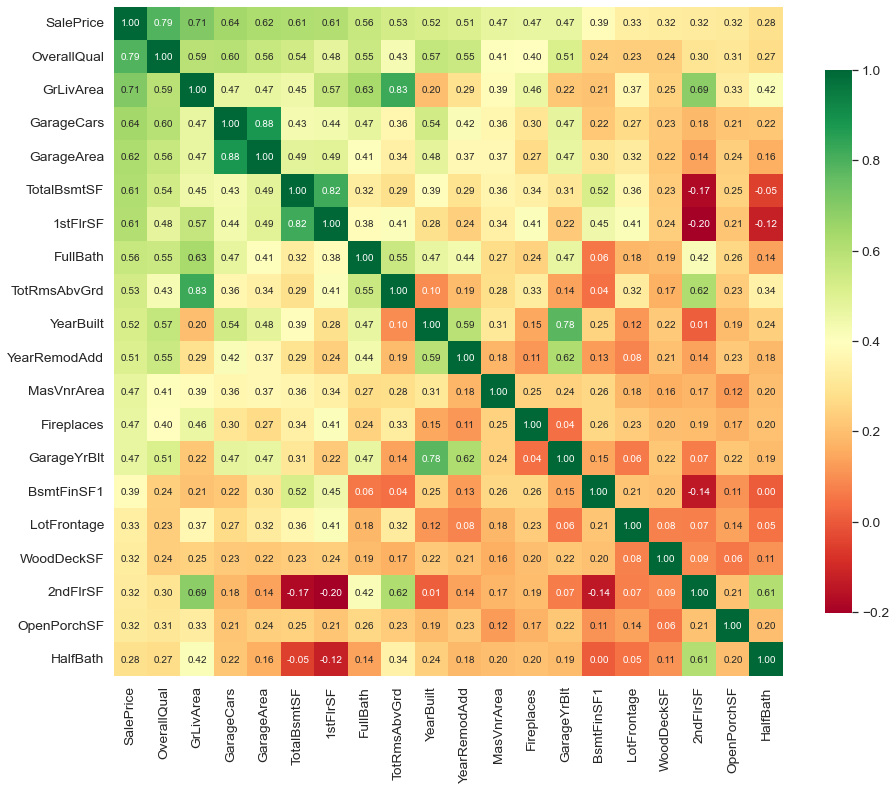

In [19]:
#SalePrice correlation matrix

k = 20 #number of variables for heatmap
plt.figure(figsize=[15,20])
cols = s_housing.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(s_housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='RdYlGn', fmt='.2f', cbar_kws={"shrink": 0.5},
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**`OBSERVATIONS:`**
- The target variable SalePrice has high correlation with OverallQual, GrLivArea, ExterQual, KitchenQual, GarageCars, GarageArea, TotalBsmtSF.
- There are high correlations between a few features which indicates Multicolinearity.

## 3. Outlier Analysis

In [20]:
# Checking the summary for the numeric columns 

s_housing.describe(percentiles=[0.25,0.50,0.75,0.85,0.95])

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count    1460.000     1460.000   1460.000     1460.000     1460.000   
mean       56.897       69.864  10516.828        6.099        5.575   
std        42.301       22.028   9981.265        1.383        1.113   
min        20.000       21.000   1300.000        1.000        1.000   
25%        20.000       60.000   7553.500        5.000        5.000   
50%        50.000       69.000   9478.500        6.000        5.000   
75%        70.000       79.000  11601.500        7.000        6.000   
85%        90.000       85.000  13161.100        8.000        7.000   
95%       160.000      104.000  17401.150        8.000        8.000   
max       190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count   1460.000      1460.000    1460.000    1460.000    1460.000   1460.000   
mean    1971.268      1984.866     103.117     443.640      46.549    567.240   
std       30.203        20.645     180.731     456.098     161.319    441.867   
min     1872.000      1950.000       0.000       0.000       0.000      0.000   
25%     1954.000      1967.000       0.000       0.000       0.000    223.000   
50%     1973.000      1994.000       0.000     383.500       0.000    477.500   
75%     2000.000      2004.000     164.250     712.250       0.000    808.000   
85%     2005.000      2006.000     261.150     929.450       0.000   1010.300   
95%     2007.000      2007.000     456.000    1274.000     396.200   1468.000   
max     2010.000      2010.000    1600.000    5644.000    1474.000   2336.000   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count     1460.000  1460.000  1460.000      1460.000   1460.000      1460.000   
mean      1057.429  1162.627   346.992         5.845   1515.464         0.425   
std        438.705   386.588   436.528        48.623    525.480         0.519   
min          0.000   334.000     0.000         0.000    334.000         0.000   
25%        795.750   882.000     0.000         0.000   1129.500         0.000   
50%        991.500  1087.000     0.000         0.000   1464.000         0.000   
75%       1298.250  1391.250   728.000         0.000   1776.750         1.000   
85%       1485.150  1572.150   870.150         0.000   1987.300         1.000   
95%       1753.000  1831.250  1141.050         0.000   2466.100         1.000   
max       6110.000  4692.000  2065.000       572.000   5642.000         3.000   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count      1460.000  1460.000  1460.000      1460.000      1460.000   
mean          0.058     1.565     0.383         2.866         1.047   
std           0.239     0.551     0.503         0.816         0.220   
min           0.000     0.000     0.000         0.000         0.000   
25%           0.000     1.000     0.000         2.000         1.000   
50%           0.000     2.000     0.000         3.000         1.000   
75%           0.000     2.000     1.000         3.000         1.000   
85%           0.000     2.000     1.000         4.000         1.000   
95%           1.000     2.000     1.000         4.000         1.000   
max           2.000     3.000     2.000         8.000         3.000   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count      1460.000    1460.000     1460.000    1460.000    1460.000   
mean          6.518       0.613     1978.589       1.767     472.980   
std           1.625       0.645       23.997       0.747     213.805   
min           2.000       0.000     1900.000       0.000       0.000   
25%           5.000       0.000     1962.000       1.000     334.500   
50%           6.000       1.000     1980.000       2.000     480.000   
75%           7.000       1.000     2001.000       2.000     576.000   
85%           8.000       1.000     2005.000       2.000     672.000   
95%        

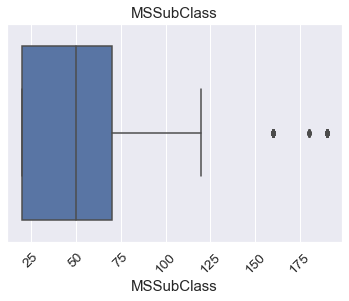

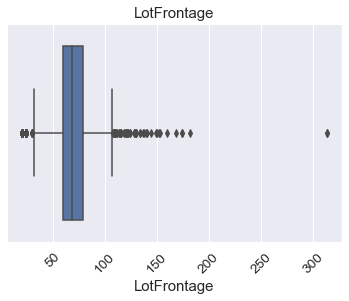

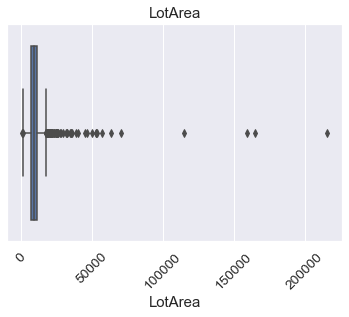

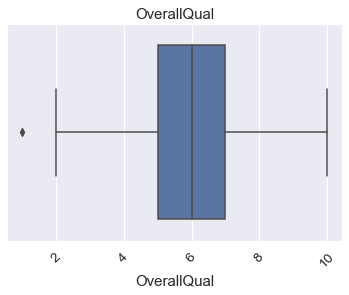

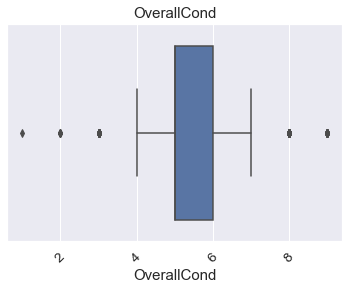

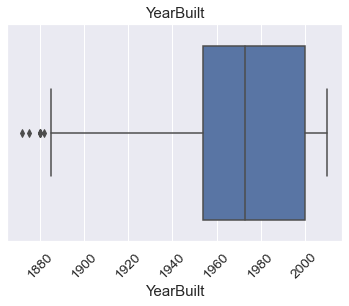

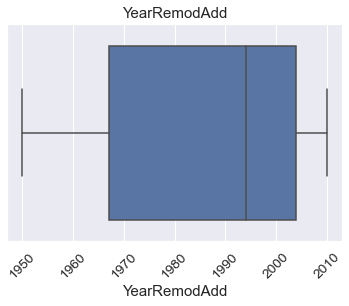

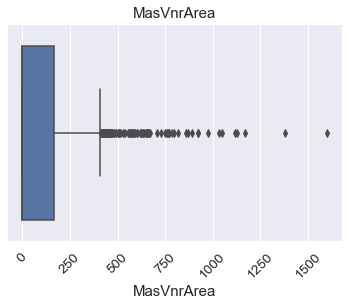

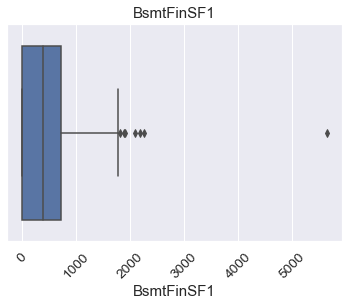

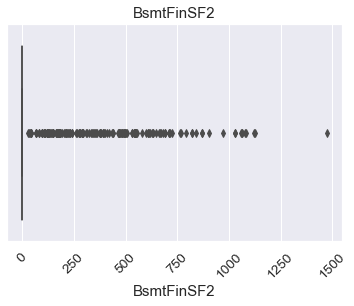

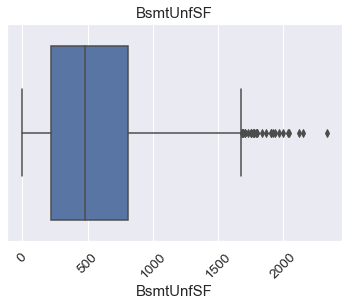

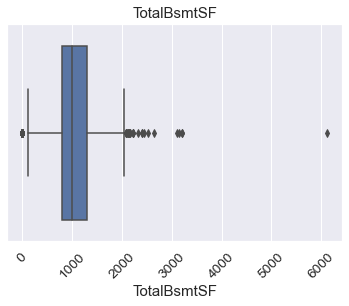

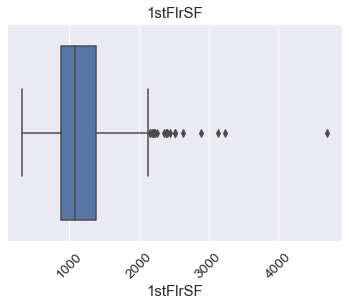

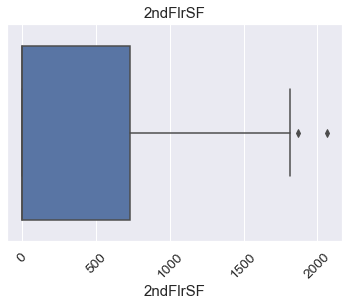

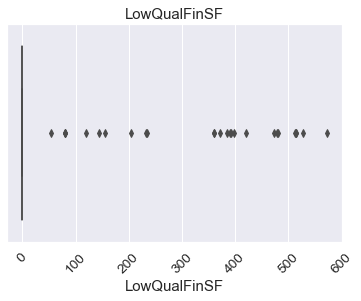

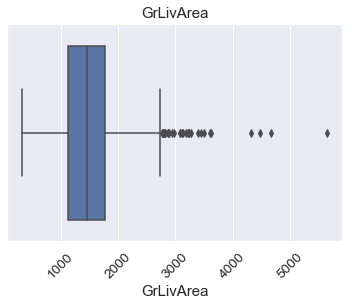

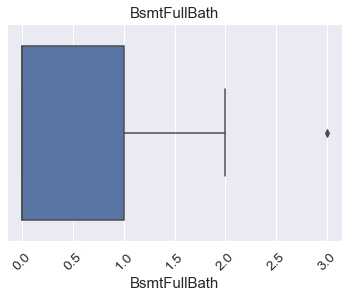

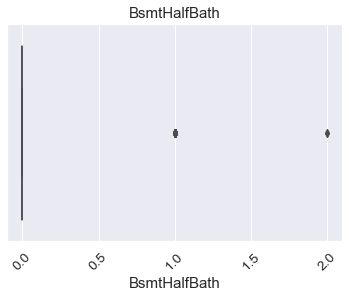

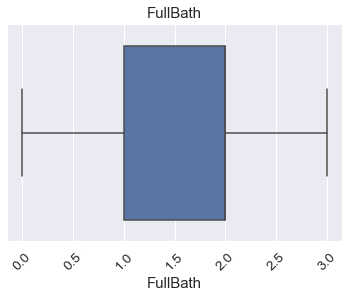

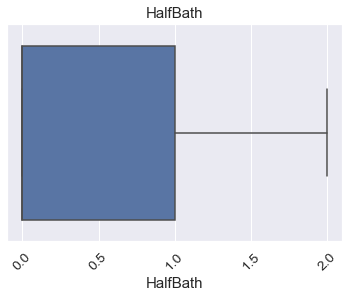

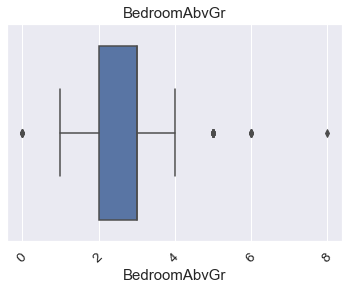

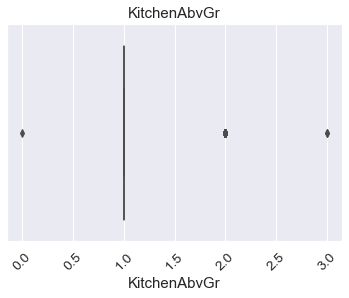

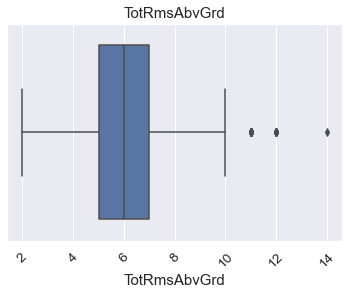

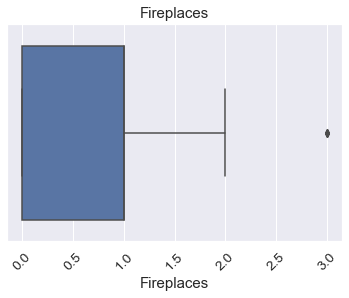

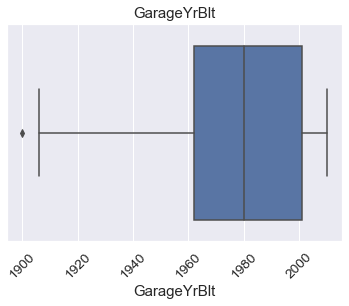

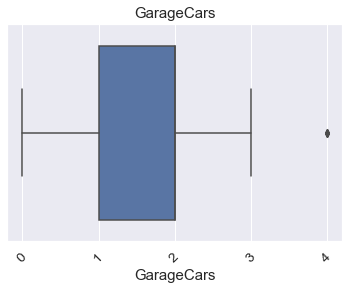

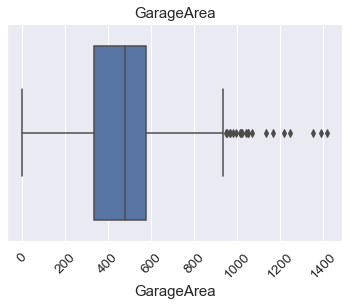

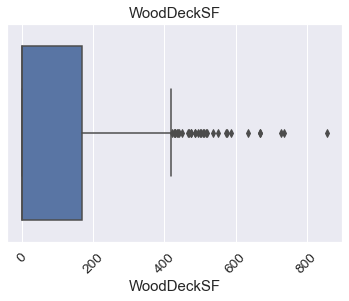

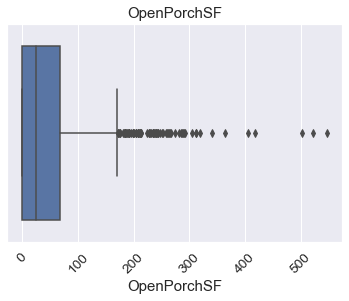

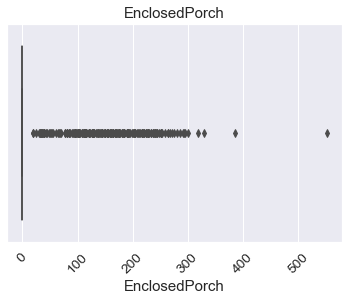

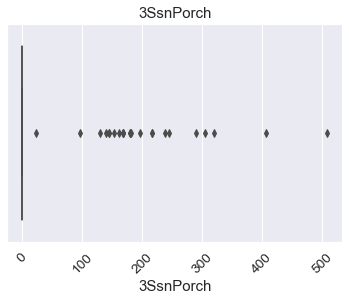

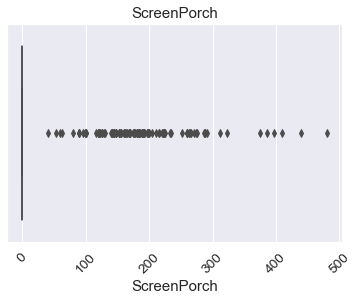

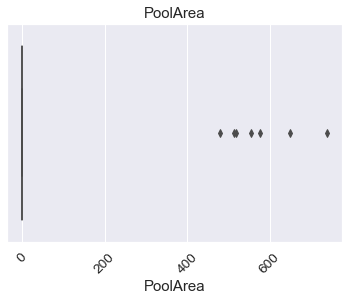

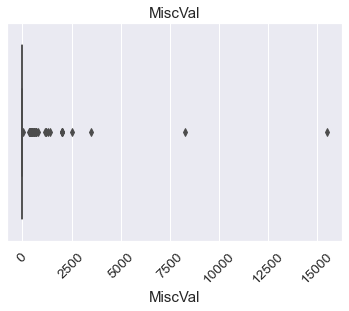

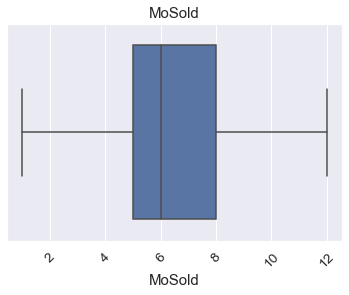

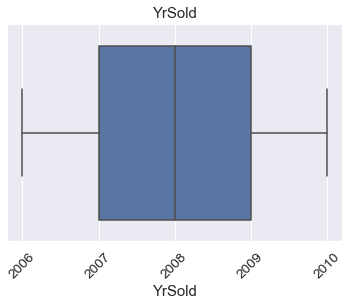

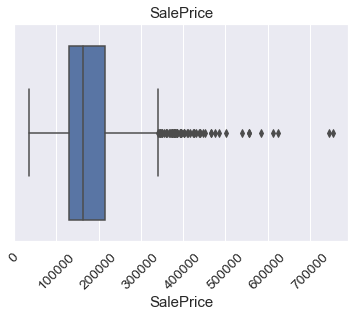

In [21]:
# Plotting Numerical variables

cols = s_housing.select_dtypes(include=['int64','float64']).columns

for i in cols:
    sns.boxplot(data=s_housing, x= i)
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

In [22]:
# Dropping the Outliers

s_housing = s_housing[s_housing.LotFrontage<300]
s_housing = s_housing[s_housing.LotArea<70000]
s_housing = s_housing[s_housing.MasVnrArea<1200]
s_housing = s_housing[s_housing.BsmtFinSF1<3000]
s_housing = s_housing[s_housing.BsmtFinSF2<1200]
s_housing = s_housing[s_housing.TotalBsmtSF<3000]
s_housing = s_housing[s_housing['1stFlrSF']<4000]
s_housing = s_housing[s_housing.GrLivArea<4000]
s_housing = s_housing[s_housing.WoodDeckSF<600]
s_housing = s_housing[s_housing.OpenPorchSF<400]
s_housing = s_housing[s_housing.EnclosedPorch<400]
s_housing = s_housing[s_housing['3SsnPorch']<350]
s_housing = s_housing[s_housing.MiscVal<6000]

In [23]:
s_housing.shape

(1430, 63)

## 4. Data Transformation

In [24]:
# Transforming Categorical columns to Ordinal Categorical columns

qual_dict = { 'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1, 'None':0 }

cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu']

for i in cols:
    s_housing[i] = s_housing[i].map(qual_dict)

In [25]:
# Transforming Categorical columns to Ordinal Categorical columns

s_housing['BsmtExposure'] = s_housing.BsmtExposure.map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None': 0})
s_housing['BsmtFinType1'] = s_housing.BsmtFinType1.map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
s_housing['BsmtFinType2'] = s_housing.BsmtFinType2.map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})

### 4.1 Dummy Variable Creation for Categorical Variables

In [26]:
cols = s_housing.select_dtypes(include='object').columns

s_housing = pd.get_dummies(data=s_housing, columns=cols, drop_first=True)

### 4.2 Transforming Target Variable due to Skewness

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

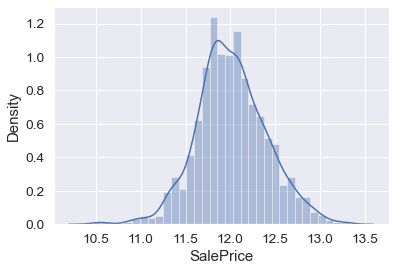

In [27]:
# Transforming Target Variable due to Right Skewness, since model performance is better with a normally distributed Target variable

sns.distplot(np.log(s_housing["SalePrice"]))

In [28]:
s_housing['SalePrice_Log'] = np.log(s_housing['SalePrice'])

## 5. Train - Test Split

In [29]:
## Assigning transformed target variable - 'SalesPrice_Log' to y
y=s_housing['SalePrice_Log']
y.head()

0   12.248
1   12.109
2   12.317
3   11.849
4   12.429
Name: SalePrice_Log, dtype: float64

In [30]:
## Assigning all dependent variables to X
X=s_housing.drop(['SalePrice_Log', 'SalePrice'] ,axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60       65.000     8450            7            5       2003   
1          20       80.000     9600            6            8       1976   
2          60       68.000    11250            7            5       2001   
3          70       60.000     9550            7            5       1915   
4          60       84.000    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtExposure  \
0          2003     196.000          4          3         4             1   
1          1976       0.000          3          3         4             4   
2          2002     162.000          4          3         4             2   
3          1970       0.000          3          3         3             1   
4          2000     350.000          4          3         4             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   
3             5         216             1           0        540          756   
4             6         655             1           0        490         1145   

   HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          5       856       854             0       1710             1   
1          5      1262         0             0       1262             0   
2          5       920       866             0       1786             1   
3          4       961       756             0       1717             1   
4          5      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1            4   
1             1         2         0             3             1            3   
2             0         2         1             3             1            4   
3             0         1         0             3             1            4   
4             0         2         1             4             1            4   

   TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  \
0             8           0            0     2003.000           2         548   
1             6           1            3     1976.000           2         460   
2             6           1            3     2001.000           2         608   
3             7           1            4     1998.000           3         642   
4             9           1            3     2000.000           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0        0       2    2008            0            0            1   
1        0       5    2007            0            0            1   
2        0       9    2008            0            0            1   
3        0       2    2006            0            0            1   
4        0      12    2008            0            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
0            0             0             0             1                  0   
1            0             0             0             1                  0   
2            0             0             0        

In [31]:
## Splitting the data set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [32]:
X_train.shape, X_test.shape

((1000, 167), (430, 167))

<AxesSubplot:>

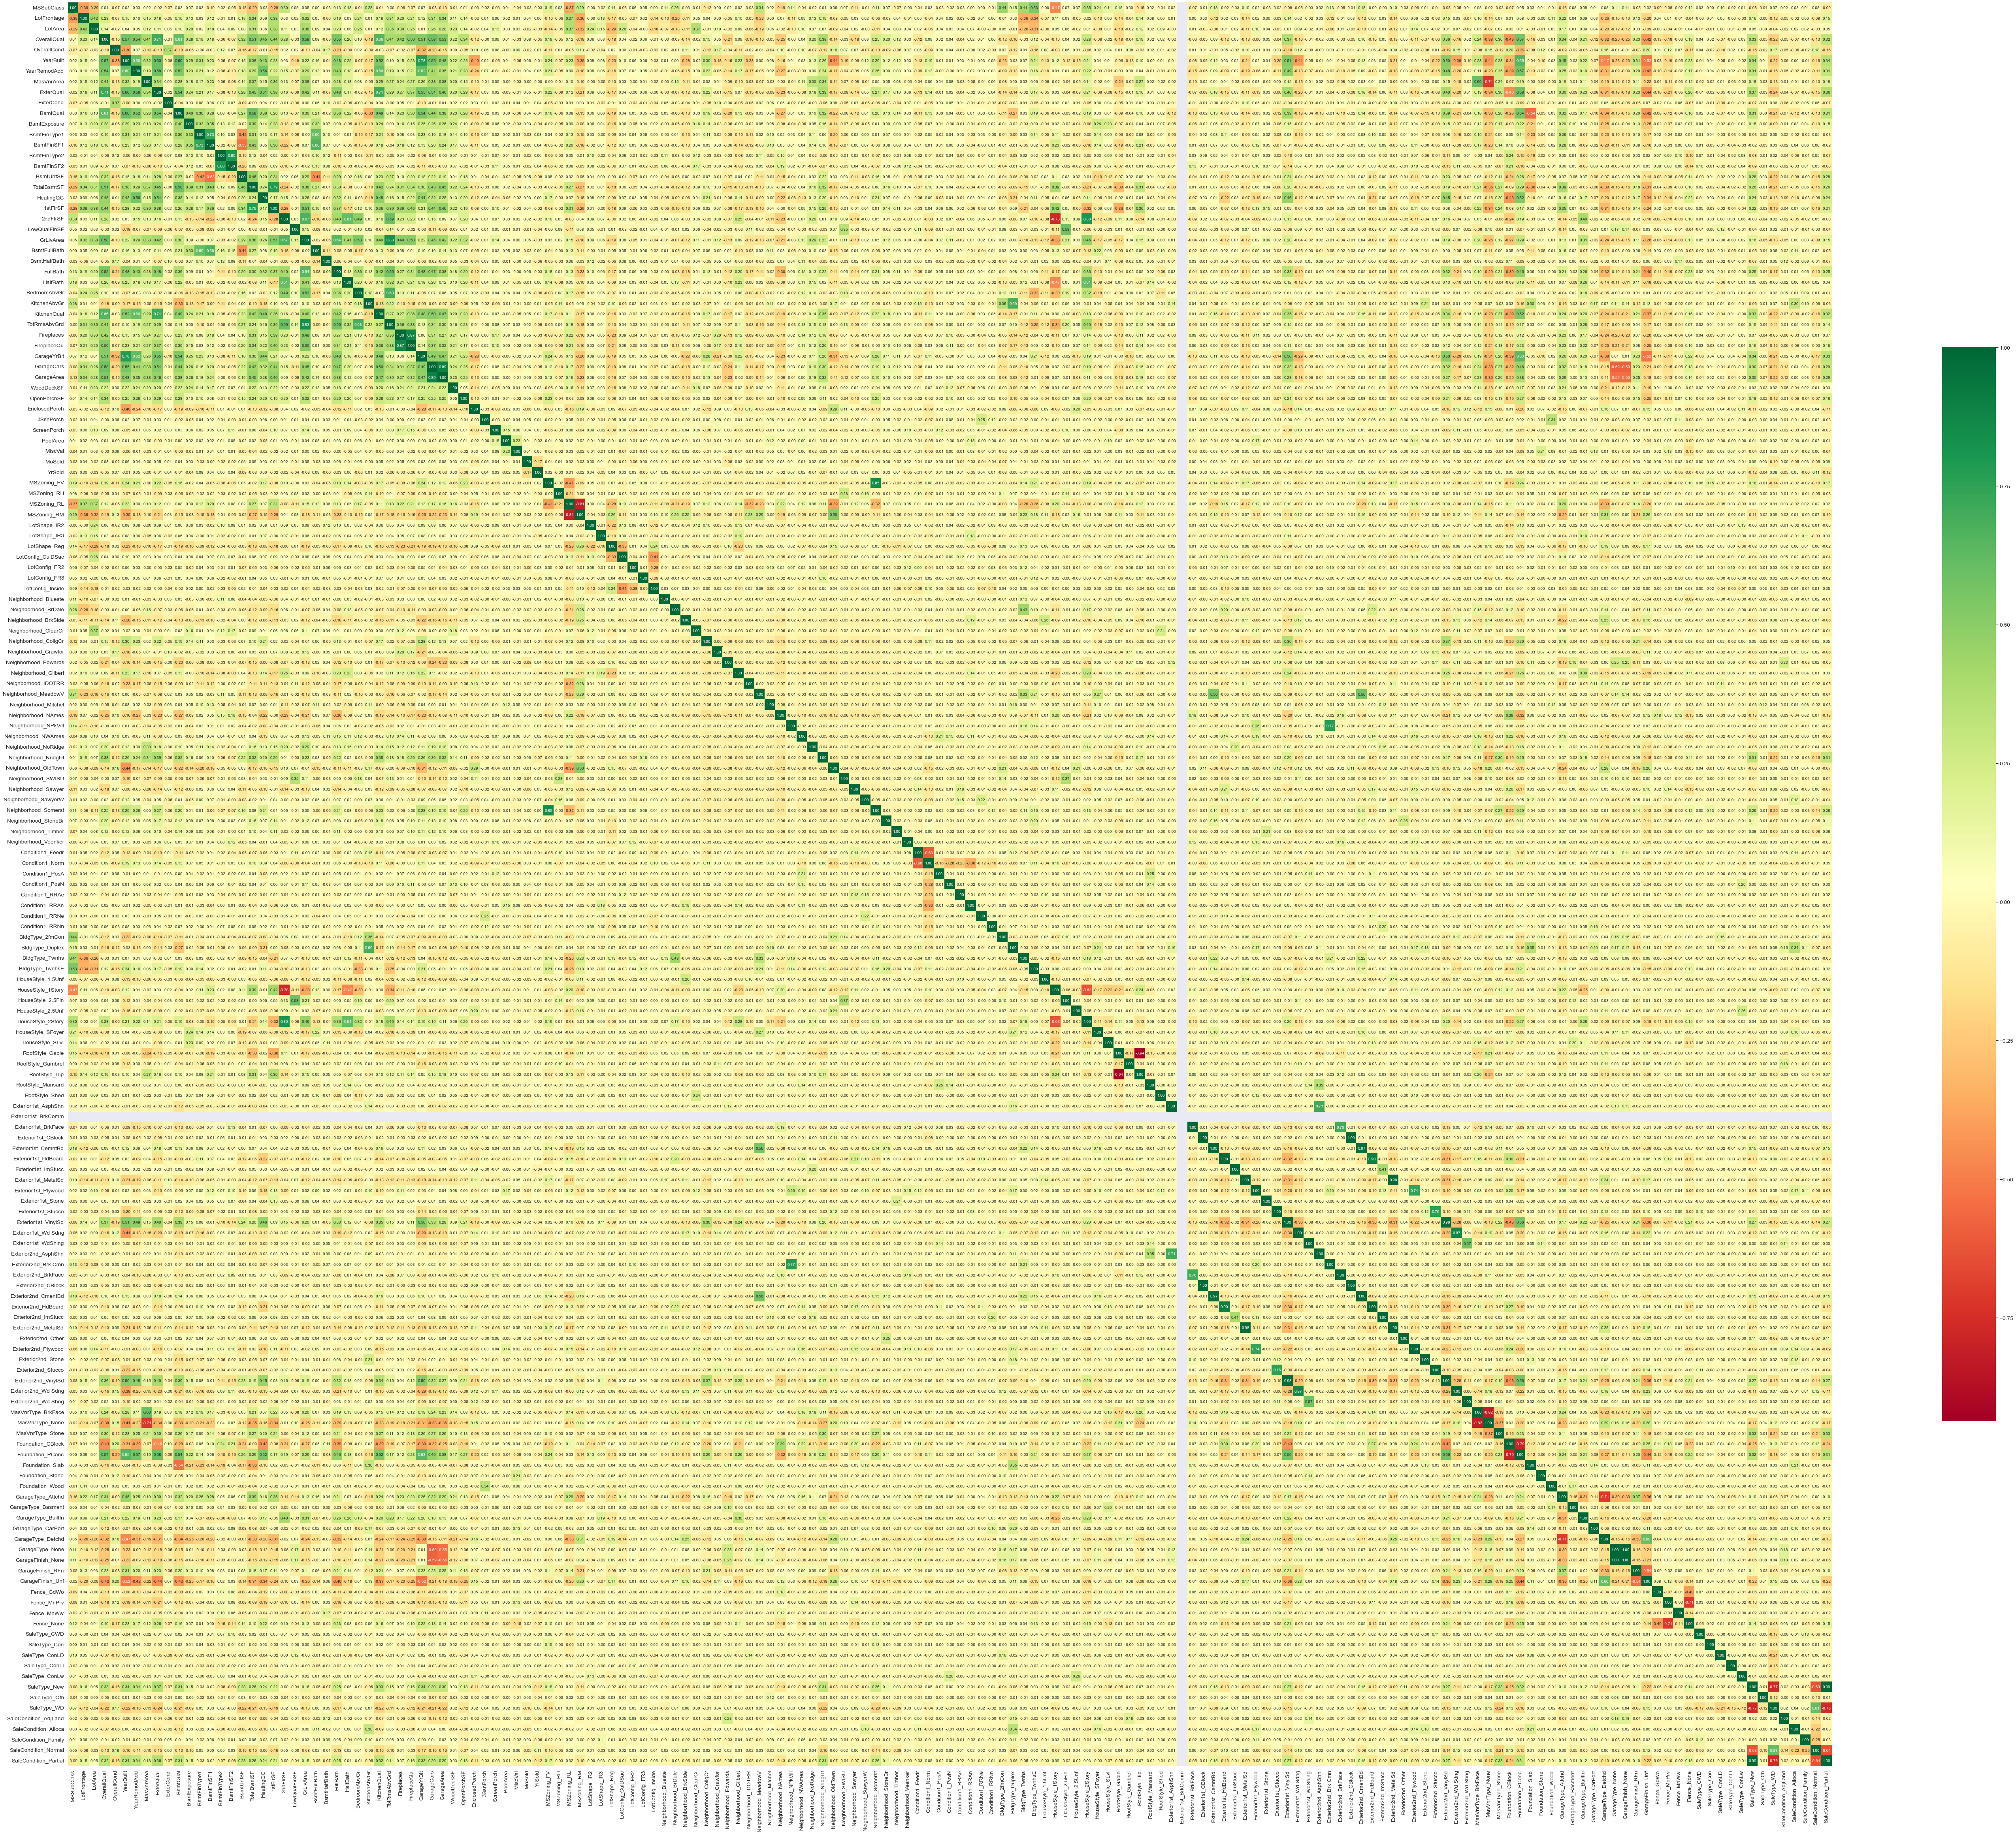

In [33]:
plt.figure(figsize=[100,100])
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlGn', fmt='.2f', annot_kws={'size': 10}, square=True, cbar_kws={"shrink": 0.5})

**`OBSERVATIONS:`**
- There are high correlations between the top 20 variables i.e., Garage, Basement, Heating, Exteriors, Floors, Bedrooms, Overall Conditions.
- This indicates Multicolinearity between the independent variables.

## 6. Feature Scaling

In [34]:
scalar = StandardScaler()

cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[cols] = scalar.fit_transform(X_train[cols])

In [35]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
693       -0.637       -0.443   -0.897       -0.782        0.342     -1.687   
1316      -0.869       -0.393    0.076        1.427       -0.533      1.236   
149       -0.174        0.008   -0.728       -0.782       -1.409     -1.183   
1054       0.057        1.061    0.306        1.427       -0.533      1.034   
1037       0.057        0.008   -0.123        1.427       -0.533      1.001   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtExposure  \
693         -0.818      -0.583     -0.668     -0.244    -0.526        -0.576   
1316         1.131       0.990      1.090     -0.244     1.728         2.266   
149         -1.694      -0.583     -0.668     -0.244     0.601        -0.576   
1054         0.839       0.640      1.090     -0.244     0.601         0.371   
1037         0.839       1.724      1.090     -0.244     0.601        -0.576   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
693         -1.204      -1.024        -0.283      -0.295      1.175   
1316        -1.204      -1.024        -0.283      -0.295      2.413   
149         -1.204      -1.024        -0.283      -0.295      0.776   
1054         1.178       1.183        -0.283      -0.295     -0.945   
1037        -1.204      -1.024        -0.283      -0.295      1.134   

      TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
693         0.106      0.903    -0.181    -0.796        -0.125     -0.852   
1316        1.469      0.903     1.354    -0.796        -0.125      0.316   
149        -0.333     -0.143    -0.668     0.271        -0.125     -0.283   
1054        0.086      0.903    -0.131     1.343        -0.125      1.069   
1037        0.062      0.903    -0.230     2.081        -0.125      1.644   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
693         -0.822        -0.237    -0.996    -0.766        -1.062   
1316         1.116        -0.237     0.825    -0.766         0.183   
149         -0.822        -0.237    -0.996    -0.766         0.183   
1054         1.116        -0.237     0.825     1.213         0.183   
1037        -0.822        -0.237     0.825     1.213         0.183   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
693         -0.220       -0.768        -1.556      -0.932       -0.977   
1316        -0.220        2.261         0.984       0.653        1.243   
149         -0.220       -0.768         0.349      -0.932       -0.977   
1054        -0.220        0.747         0.349       0.653        1.243   
1037        -0.220        0.747         0.349       0.653        0.688   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
693        -0.448      -0.982      -0.648      -0.779       -0.721   
1316        1.237       1.700       1.849       0.656       -0.043   
149        -1.797      -0.982      -1.050       0.890        1.118   
1054        0.985       0.359       0.568       0.881        0.247   
1037        0.942       0.359       2.059      -0.779        0.005   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
693           1.518     -0.101       -0.273    -0.045   -0.152   2.109   
1316         -0.377     -0.101       -0.273    -0.045   -0.152  -1.967   
149          -0.377     -0.101       -0.273    -0.045   -0.152  -0.856   
1054         -0.377     -0.101       -0.273    -0.045   -0.152   1.738   
1037         -0.377     -0.101        3.087    -0.045   -0.152   0.997   

      YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
693   -1.346            0            0            1            0   
1316   0.900            0            0            1            0   
149   -1.346            0            0            0            1   
1054  -1.346            0            0            1            0   
1037   0.151            0            0            1            0   

      LotShape_IR2 

## 7. Linear Regression

In [36]:
# Building a Linear Regression model first with OLS

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_Log   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     80.54
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:11:14   Log-Likelihood:                 943.71
No. Observations:                1000   AIC:                            -1561.
Df Residuals:                     837   BIC:                            -761.5
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.51

- R2 score - 0.94
- Adjusted R2 score - 0.928

**`OBSERVATIONS:`**
- Many columns seem to have insignificant p-value

In [37]:
# Checking the model on test set

cols = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test[cols] = scalar.transform(X_test[cols])

y_test_pred = lr.predict(sm.add_constant(X_test))

print("R2 score:", round(metrics.r2_score(y_test, y_test_pred),3))
print("MSE:", round(metrics.mean_squared_error(y_test, y_test_pred),3))
print("RMSE:", round(metrics.mean_squared_error(y_test, y_test_pred)**0.5,3))

R2 score: 0.904
MSE: 0.016
RMSE: 0.125


## Building Regularized Models

## 8. RIDGE Regression

In [38]:
#Building a Ridge Regression model using various values for lambda

ridge = Ridge()

params = {'alpha': [1e-5, 1e-3, 1e-2, 1, 5, 10, 20, 25, 30, 35, 40, 45, 50, 100,200,500,1000] }

ridge_grid = GridSearchCV(ridge, param_grid=params, cv=5, verbose=1, n_jobs=-1, return_train_score=True, 
                    scoring='neg_mean_squared_error')

In [39]:
ridge_grid.fit(X_train,y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.5s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.001, 0.01, 1, 5, 10, 20, 25, 30, 35,
                                   40, 45, 50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [40]:
#Checking the best scores

print("Best param:",ridge_grid.best_estimator_)
print("Best MSE:",round(ridge_grid.best_score_,3))
print("Best RMSE:",round(abs(ridge_grid.best_score_)**0.5,3))
print("R2 on train set:", round(metrics.r2_score(y_true=y_train, y_pred=ridge_grid.predict(X_train)),3))
print("R2 on test set:", round(metrics.r2_score(y_true=y_test, y_pred=ridge_grid.predict(X_test)),3))

Best param: Ridge(alpha=20)
Best MSE: -0.013
Best RMSE: 0.114
R2 on train set: 0.931
R2 on test set: 0.91


In [41]:
# Storing the results in a DataFrame

cv_results = pd.DataFrame(ridge_grid.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0          0.083         0.019            0.018           0.008       0.000   
1          0.069         0.048            0.012           0.004       0.001   
2          0.031         0.010            0.010           0.003       0.010   
3          0.026         0.005            0.019           0.008           1   
4          0.043         0.014            0.016           0.002           5   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 1e-05}             -0.014             -0.021             -0.013   
1  {'alpha': 0.001}             -0.014             -0.021             -0.013   
2   {'alpha': 0.01}             -0.014             -0.021             -0.013   
3      {'alpha': 1}             -0.012             -0.020             -0.011   
4      {'alpha': 5}             -0.011             -0.020             -0.011   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0             -0.014             -0.014           -0.015           0.003   
1             -0.014             -0.014           -0.015           0.003   
2             -0.014             -0.014           -0.015           0.003   
3             -0.013             -0.013           -0.014           0.003   
4             -0.012             -0.013           -0.013           0.004   

   rank_test_score  split0_train_score  split1_train_score  \
0               15              -0.009              -0.007   
1               14              -0.009              -0.007   
2               13              -0.009              -0.007   
3               11              -0.009              -0.007   
4                9              -0.010              -0.008   

   split2_train_score  split3_train_score  split4_train_score  \
0              -0.009              -0.009              -0.008   
1              -0.009              -0.009              -0.008   
2              -0.009              -0.009              -0.008   
3              -0.009              -0.009              -0.009   
4              -0.010              -0.009              -0.009   

   mean_train_score  std_train_score  
0            -0.008            0.001  
1            -0.008            0.001  
2            -0.008            0.001  
3            -0.009            0.001  
4            -0.009            0.001

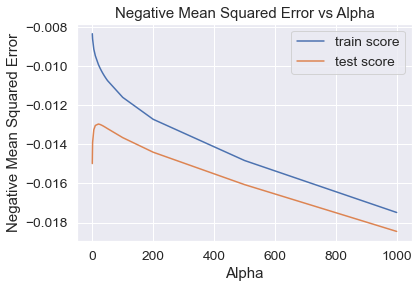

In [42]:
# Plotting for different Alphas

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')

plt.title("Negative Mean Squared Error vs Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [43]:
#Building a model with optimal Alpha value for Ridge

best_ridge = Ridge(alpha=20)

best_ridge.fit(X_train, y_train)

Ridge(alpha=20)

## 9. LASSO Regression

In [44]:
#Building a Ridge Regression model using various values for lambda

lasso = Lasso()

lasso_grid = GridSearchCV(lasso, param_grid=params, cv=5, verbose=1, n_jobs=-1, return_train_score=True, 
                          scoring='neg_mean_squared_error')

In [45]:
lasso_grid.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.001, 0.01, 1, 5, 10, 20, 25, 30, 35,
                                   40, 45, 50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [46]:
#Checking the best scores

print("Best param:",lasso_grid.best_estimator_)
print("Best score:",round(lasso_grid.best_score_,3))
print("Best RMSE:",round(abs(lasso_grid.best_score_)**0.5,3))
print("R2 on train set:", round(metrics.r2_score(y_true=y_train, y_pred=lasso_grid.predict(X_train)),3))
print("R2 on test set:", round(metrics.r2_score(y_true=y_test, y_pred=lasso_grid.predict(X_test)),3))

Best param: Lasso(alpha=0.001)
Best score: -0.013
Best RMSE: 0.113
R2 on train set: 0.926
R2 on test set: 0.909


In [47]:
# Storing the results in a DataFrame

cv_results = pd.DataFrame(lasso_grid.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0          0.243         0.059            0.009           0.008       0.000   
1          0.068         0.010            0.010           0.006       0.001   
2          0.033         0.018            0.012           0.012       0.010   
3          0.022         0.008            0.012           0.012           1   
4          0.016         0.000            0.012           0.006           5   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 1e-05}             -0.013             -0.020             -0.013   
1  {'alpha': 0.001}             -0.010             -0.020             -0.011   
2   {'alpha': 0.01}             -0.011             -0.024             -0.014   
3      {'alpha': 1}             -0.135             -0.171             -0.141   
4      {'alpha': 5}             -0.135             -0.171             -0.141   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0             -0.013             -0.014           -0.015           0.003   
1             -0.012             -0.012           -0.013           0.004   
2             -0.013             -0.014           -0.015           0.005   
3             -0.147             -0.144           -0.147           0.012   
4             -0.147             -0.144           -0.147           0.012   

   rank_test_score  split0_train_score  split1_train_score  \
0                2              -0.009              -0.007   
1                1              -0.011              -0.009   
2                3              -0.015              -0.012   
3                4              -0.150              -0.141   
4                4              -0.150              -0.141   

   split2_train_score  split3_train_score  split4_train_score  \
0              -0.009              -0.009              -0.008   
1              -0.011              -0.011              -0.011   
2              -0.015              -0.015              -0.014   
3              -0.149              -0.147              -0.148   
4              -0.149              -0.147              -0.148   

   mean_train_score  std_train_score  
0            -0.008            0.001  
1            -0.011            0.001  
2            -0.014            0.001  
3            -0.147            0.003  
4            -0.147            0.003

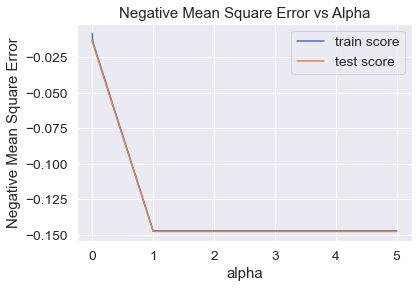

In [48]:
# Plotting for different Alphas

cv_results = cv_results[cv_results['param_alpha']<=5]

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Square Error')

plt.title("Negative Mean Square Error vs Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [49]:
#Building a model with optimal Alpha value for Lasso

best_lasso = Lasso(alpha=0.001)

best_lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [50]:
#Checking feature importance in Lasso and Ridge regression

features = pd.DataFrame(index=X_train.columns, columns=['Ridge_Coef', 'Lasso_Coef'])
features['Ridge_Coef'] = best_ridge.coef_
features['Lasso_Coef'] = best_lasso.coef_

In [51]:
features.sort_values(by=['Lasso_Coef', 'Ridge_Coef'],ascending=False)

Ridge_Coef  Lasso_Coef
GrLivArea                   0.059       0.110
SaleCondition_Partial       0.041       0.090
Neighborhood_Crawfor        0.071       0.088
OverallQual                 0.076       0.083
SaleCondition_Normal        0.061       0.068
YearBuilt                   0.058       0.064
OverallCond                 0.054       0.055
Exterior1st_BrkFace         0.044       0.050
TotalBsmtSF                 0.043       0.044
Foundation_PConc            0.034       0.035
BsmtFinSF1                  0.034       0.032
Neighborhood_BrkSide        0.025       0.030
GarageCars                  0.019       0.025
LotArea                     0.023       0.024
Condition1_Norm             0.028       0.023
Neighborhood_NridgHt        0.030       0.018
FireplaceQu                 0.014       0.016
KitchenQual                 0.015       0.016
Neighborhood_StoneBr        0.038       0.015
HeatingQC                   0.014       0.014
MSZoning_FV                 0.033       0.014
YearRemodAdd                0.017       0.013
ScreenPorch                 0.013       0.012
GarageArea                  0.015       0.012
BsmtFullBath                0.013       0.012
WoodDeckSF                  0.010       0.010
BsmtExposure                0.011       0.009
OpenPorchSF                 0.010       0.009
GarageType_Attchd           0.023       0.009
TotRmsAbvGrd                0.010       0.008
LotFrontage                 0.010       0.008
HalfBath                    0.011       0.006
MasVnrArea                  0.007       0.005
BsmtFinSF2                  0.008       0.005
MasVnrType_Stone            0.015       0.004
Exterior2nd_MetalSd         0.010       0.004
Neighborhood_NAmes         -0.002       0.004
Fireplaces                  0.008       0.004
Neighborhood_Somerst        0.020       0.004
EnclosedPorch               0.005       0.004
FullBath                    0.010       0.004
Exterior1st_VinylSd         0.010       0.002
2ndFlrSF                    0.040       0.001
BedroomAbvGr                0.003       0.001
GarageType_Detchd           0.015       0.001
BsmtHalfBath                0.001       0.001
1stFlrSF                    0.030       0.000
MSZoning_RL                 0.029       0.000
SaleType_New                0.029       0.000
Foundation_Slab             0.021       0.000
MSZoning_RH                 0.021       0.000
Exterior2nd_Wd Sdng         0.019       0.000
BldgType_Duplex             0.017       0.000
GarageType_BuiltIn          0.016       0.000
Exterior2nd_CmentBd         0.015       0.000
LotConfig_CulDSac           0.014       0.000
SaleCondition_AdjLand       0.014       0.000
Neighborhood_ClearCr        0.013       0.000
Neighborhood_Veenker        0.012       0.000
HouseStyle_1.5Unf           0.011       0.000
BldgType_TwnhsE             0.010       0.000
Fence_MnPrv                 0.010       0.000
Fence_MnWw                  0.010       0.000
SaleType_CWD                0.009       0.000
Exterior2nd_Stucco          0.009       0.000
HouseStyle_SLvl             0.009       0.000
Exterior1st_Stucco          0.009       0.000
Condition1_PosA             0.008       0.000
Condition1_RRNn             0.006       0.000
Exterior2nd_BrkFace         0.006       0.000
Condition1_PosN             0.006       0.000
RoofStyle_Shed              0.006       0.000
Foundation_Stone            0.005       0.000
LotShape_IR2                0.005       0.000
Exterior1st_WdShing         0.005       0.000
Exterior2nd_Brk Cmn         0.005       0.000
HouseStyle_2.5Fin           0.005       0.000
Neighborhood_NPkVill        0.005       0.000
Exterior2nd_ImStucc         0.004       0.000
HouseStyle_2.5Unf           0.004       0.000
LotShape_Reg                0.004       0.000
RoofStyle_Gambrel           0.004       0.000
MasVnrType_None             0.004       0.000
BsmtUnfSF                   0.004      -0.000
BsmtFinType1                0.003       0.000
Condition1_Feedr            0.003       0.000
SaleType_Con         

In [52]:
#Checking the top 5 features

features[abs(features['Lasso_Coef']) > 0]['Lasso_Coef'].sort_values(ascending=False).head()

GrLivArea               0.110
SaleCondition_Partial   0.090
Neighborhood_Crawfor    0.088
OverallQual             0.083
SaleCondition_Normal    0.068
Name: Lasso_Coef, dtype: float64

In [53]:
# Checking the number of features Lasso Regression has selected

features[features['Lasso_Coef'] != 0]['Lasso_Coef'].count()

66

## SUMMARY

### Final Model Parameters on Train Dataset:

#### RIDGE Regression

    Best lambda value: alpha=20
    Best Mean squared error: -0.013
    Best Root Mean squared error: 0.114
    R-square value on train set: 0.931
    R-square value on test set: 0.91
    
#### LASSO Regression

    Best lambda value: alpha=0.001
    Best Mean squared error: -0.013
    Best Root Mean squared error: 0.113
    R-square value on train set: 0.926
    R-square value on test set: 0.909

### The equation of best fitted line for Lasso Regression with top 10 features is:

<br>

$ SalesPrice = 0.110  \times  GrLivArea + 0.090 \times \text{SaleCondition_Partial} + 0.088 \times \text{Neighborhood_Crawfor} + 0.083 \times OverallQual + 0.068 \times \text{SaleCondition_Normal} + 0.064 \times YearBuilt - 0.056 \times \text{MSZoning_RM} + 0.055 \times OverallCond + 0.050 \times \text{Exterior1st_BrkFace} + 0.044 \times TotalBsmtSF $

### Insights to the Company:
<br>


1. Which variables are significant in predicting the price of a house?

- A: The top variables - GrLivArea, SaleCondition_Partial, Neighborhood_Crawfor, OverallQual, SaleCondition_Normal, MSZoning_RM, Exterior1st_BrkFace are significant in predicting the price of a house.

2. How well those variables describe the price of a house?

- A: The variables are able to describe approximately 93% of the house prices.

### Code for Assignment Questions

### Q1

In [54]:
## Doubling optimal values of alpha for Ridge and checking

r_alpha = 40
r_grid = Ridge(r_alpha)
r_grid.fit(X_train,y_train)

Ridge(alpha=40)

In [55]:
## Doubling optimal values of alpha for Lasso and checking

l_alpha= 0.002
l_grid = Lasso(l_alpha)
l_grid.fit(X_train, y_train)

Lasso(alpha=0.002)

In [56]:
#Checking feature importance in Lasso and Ridge regression

new_features = pd.DataFrame(index=X_train.columns, columns=['Ridge_Coef', 'Lasso_Coef'])
new_features['Ridge_Coef'] = r_grid.coef_
new_features['Lasso_Coef'] = l_grid.coef_

In [57]:
new_features.sort_values(by=['Lasso_Coef', 'Ridge_Coef'],ascending=False)

Ridge_Coef  Lasso_Coef
GrLivArea                   0.056       0.112
OverallQual                 0.075       0.088
SaleCondition_Partial       0.032       0.066
YearBuilt                   0.053       0.062
Neighborhood_Crawfor        0.051       0.055
OverallCond                 0.053       0.054
TotalBsmtSF                 0.041       0.045
SaleCondition_Normal        0.048       0.043
BsmtFinSF1                  0.033       0.032
GarageCars                  0.020       0.030
Foundation_PConc            0.028       0.028
LotArea                     0.023       0.024
FireplaceQu                 0.016       0.019
KitchenQual                 0.016       0.017
Exterior1st_BrkFace         0.032       0.017
HeatingQC                   0.015       0.016
Condition1_Norm             0.023       0.014
GarageArea                  0.017       0.013
YearRemodAdd                0.017       0.012
ScreenPorch                 0.013       0.011
BsmtFullBath                0.013       0.009
OpenPorchSF                 0.010       0.009
WoodDeckSF                  0.010       0.008
LotFrontage                 0.010       0.008
BsmtExposure                0.011       0.007
GarageType_Attchd           0.020       0.007
HalfBath                    0.012       0.006
TotRmsAbvGrd                0.011       0.004
Fireplaces                  0.009       0.004
MasVnrArea                  0.008       0.004
FullBath                    0.012       0.002
BsmtFinSF2                  0.009       0.002
EnclosedPorch               0.004       0.001
ExterQual                   0.001       0.001
2ndFlrSF                    0.037       0.000
1stFlrSF                    0.031       0.000
SaleType_New                0.025       0.000
Neighborhood_StoneBr        0.024       0.000
MSZoning_RL                 0.024       0.000
MSZoning_FV                 0.024       0.000
Neighborhood_NridgHt        0.020       0.000
Neighborhood_BrkSide        0.019       0.000
Neighborhood_Somerst        0.017       0.000
Foundation_Slab             0.014       0.000
MSZoning_RH                 0.012       0.000
GarageType_BuiltIn          0.012       0.000
Exterior2nd_Wd Sdng         0.012       0.000
MasVnrType_Stone            0.012       0.000
LotConfig_CulDSac           0.011       0.000
GarageType_Detchd           0.010       0.000
BldgType_Duplex             0.010       0.000
Neighborhood_ClearCr        0.009       0.000
BldgType_TwnhsE             0.009       0.000
Exterior2nd_CmentBd         0.008       0.000
Fence_MnPrv                 0.007       0.000
Exterior2nd_MetalSd         0.007       0.000
Neighborhood_Veenker        0.007       0.000
Exterior2nd_BrkFace         0.007       0.000
Exterior1st_VinylSd         0.006       0.000
HouseStyle_1.5Unf           0.006       0.000
SaleCondition_AdjLand       0.006       0.000
SaleType_CWD                0.005       0.000
Fence_MnWw                  0.005       0.000
HouseStyle_SLvl             0.005       0.000
Exterior2nd_Stucco          0.005       0.000
Exterior1st_Stucco          0.004       0.000
Condition1_PosA             0.004       0.000
BsmtFinType1                0.004       0.000
BsmtUnfSF                   0.004      -0.000
LotShape_IR2                0.003       0.000
RoofStyle_Shed              0.003       0.000
BedroomAbvGr                0.003       0.000
Condition1_RRNn             0.003       0.000
Condition1_PosN             0.003       0.000
Exterior1st_MetalSd         0.003       0.000
RoofStyle_Gambrel           0.003       0.000
HouseStyle_2.5Unf           0.002       0.000
MasVnrType_None             0.002      -0.000
HouseStyle_2.5Fin           0.002      -0.000
Exterior2nd_Brk Cmn         0.002       0.000
Neighborhood_NPkVill        0.002       0.000
Neighborhood_NAmes          0.002       0.000
SaleType_Con                0.002       0.000
Foundation_Stone            0.002       0.000
Exterior2nd_ImStucc         0.002       0.000
Exterior2nd_VinylSd         0.002       0.000
LotShape_Reg         

### Q3

In [58]:
#Dropping the top 5 variables

X_assign = X_train.drop(['GrLivArea', 'SaleCondition_Partial', 'Neighborhood_Crawfor', 'OverallQual','SaleCondition_Normal'], axis=1)

In [59]:
l_assign = best_lasso.fit(X_assign, y_train)
r_assign = best_ridge.fit(X_assign, y_train)

In [60]:
# Checking new 5 important variables

new_features = pd.DataFrame(index=X_assign.columns, columns=['Ridge_Coef', 'Lasso_Coef'])
new_features['Ridge_Coef'] = r_assign.coef_
new_features['Lasso_Coef'] = l_assign.coef_

In [61]:
new_features.sort_values(by=['Lasso_Coef', 'Ridge_Coef'],ascending=False)

Ridge_Coef  Lasso_Coef
2ndFlrSF                    0.096       0.116
1stFlrSF                    0.079       0.092
YearBuilt                   0.069       0.076
OverallCond                 0.066       0.069
Neighborhood_StoneBr        0.054       0.063
TotalBsmtSF                 0.050       0.057
Exterior1st_BrkFace         0.049       0.055
Neighborhood_NridgHt        0.038       0.042
MSZoning_FV                 0.040       0.034
BsmtFinSF1                  0.036       0.030
Foundation_PConc            0.035       0.030
SaleType_New                0.024       0.030
GarageType_Attchd           0.034       0.027
GarageCars                  0.021       0.027
FireplaceQu                 0.023       0.026
Neighborhood_Somerst        0.028       0.025
KitchenQual                 0.021       0.022
Condition1_Norm             0.025       0.021
MSZoning_RL                 0.035       0.021
LotArea                     0.018       0.017
HeatingQC                   0.016       0.016
ScreenPorch                 0.014       0.014
ExterQual                   0.012       0.014
GarageArea                  0.017       0.014
GarageType_Detchd           0.018       0.012
BsmtExposure                0.013       0.012
YearRemodAdd                0.016       0.012
OpenPorchSF                 0.012       0.011
Neighborhood_BrkSide        0.016       0.011
LotFrontage                 0.012       0.011
BsmtFullBath                0.011       0.010
MasVnrType_Stone            0.023       0.010
LowQualFinSF                0.011       0.010
Fireplaces                  0.013       0.010
TotRmsAbvGrd                0.014       0.009
MasVnrArea                  0.009       0.009
FullBath                    0.015       0.008
EnclosedPorch               0.008       0.006
WoodDeckSF                  0.008       0.006
BsmtQual                    0.010       0.006
HalfBath                    0.012       0.006
BsmtFinSF2                  0.012       0.006
Exterior2nd_Wd Sdng         0.023       0.004
Exterior2nd_MetalSd         0.008       0.003
Foundation_Slab             0.027       0.000
MSZoning_RH                 0.024       0.000
BldgType_Duplex             0.024       0.000
HouseStyle_2.5Unf           0.019       0.000
Exterior1st_Stucco          0.018       0.000
HouseStyle_1.5Unf           0.017       0.000
GarageType_BuiltIn          0.015       0.000
SaleType_CWD                0.015       0.000
LotConfig_CulDSac           0.014       0.000
BldgType_TwnhsE             0.012       0.000
Exterior2nd_Stucco          0.012       0.000
Exterior2nd_CmentBd         0.012       0.000
Fence_MnWw                  0.011       0.000
SaleCondition_AdjLand       0.010       0.000
Condition1_RRNn             0.009       0.000
MasVnrType_BrkFace          0.009       0.000
RoofStyle_Shed              0.008       0.000
Exterior2nd_BrkFace         0.008       0.000
Neighborhood_Veenker        0.008       0.000
Condition1_PosA             0.007       0.000
HouseStyle_2.5Fin           0.007       0.000
BsmtUnfSF                   0.007      -0.000
MasVnrType_None             0.006      -0.000
Neighborhood_NPkVill        0.006       0.000
HouseStyle_SLvl             0.006       0.000
Condition1_RRAn             0.006       0.000
SaleType_Con                0.005       0.000
RoofStyle_Hip               0.005       0.000
Exterior2nd_Brk Cmn         0.005       0.000
Exterior2nd_VinylSd         0.004       0.000
Exterior1st_VinylSd         0.004       0.000
Exterior1st_MetalSd         0.004       0.000
Exterior1st_WdShing         0.004       0.000
LotShape_Reg                0.004       0.000
Exterior2nd_AsphShn         0.004       0.000
Exterior1st_AsphShn         0.003       0.000
SaleType_ConLw              0.003       0.000
Condition1_PosN             0.003       0.000
BsmtFinType1                0.003       0.000
Exterior2nd_ImStucc         0.003       0.000
BedroomAbvGr                0.003       0.000
LotShape_IR2                0.002       0.000
Exterior1st_ImStucc  